# Deque

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/deque.ipynb)

## Double-ended Queue

With Python lists, we can add and remove elements from the *end* of the list in constant time, but adding and removing from the beginning takes linear time.
That's because Python lists are implemented using arrays that grow dynamically.

With linked lists, we can add and remove elements from the *beginning* of the list in constant time, but adding and removing from the end takes linear time.

With either of these implementations, it is easy to make a stack, that is, a collection where the first element we add is the last element we remove. A stack is also called a "first-in, last-out" queue, abbreviated FILO.

But it is not easy to implement a "first-in, first-out" queue, that is, a collection where the first element we add is the *first* element we remove.

Fortunately, there are ways to implement lists that can add and remove elements from both ends in constant time.
A collection that has this property is called a double-ended queue, abbreviated "deque" and pronounced like "deck".

One way to implement a deque is a doubly-linked list, also known as a "head-tail linked list".
Each node in a doubly-linked list has a reference to the previous node in the list as well as the next element, which I will call `left` and `right`.


In [2]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node({self.data})'

We can create nodes like this:

In [3]:
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node1

Node(1)

And then link them up, like this:

In [4]:
node1.right = node2
node2.right = node3

node2.left = node1
node3.left = node2

To traverse the list from left to right, we can start at the beginning and follow the `right` links.

In [5]:
node = node1
while node:
    print(node)
    node = node.right

Node(1)
Node(2)
Node(3)


To traverse from right to left, we start and the end and follow the `left` links.

In [6]:
node = node3
while node:
    print(node)
    node = node.left

Node(3)
Node(2)
Node(1)


## Deque objects

For some operations, it will be convenient to have another object that represents the whole list (as opposed to one of its nodes).

Here's the class definition.

In [7]:
class Deque:
    def __init__(self, head=None, tail=None):
        self.head = head
        self.tail = tail

    def __repr__(self):
        return f'LinkedList({self.head}, {self.tail})'

Now we can create a `Deque` with references to `node1` and `node3`:

In [8]:
deque = Deque(node1, node3)
deque

LinkedList(Node(1), Node(3))

For debugging purposes, I'll use the following function, which prints the list from right to left and then left to right, which confirms that all of the links are correct.

In [9]:
def print_deque(deque):
    node = deque.head
    while node:
        print(node.data, end=', ')
        node = node.right
    print()

    node = deque.tail
    while node:
        print(node.data, end=', ')
        node = node.left
    print()

Here's an example.

In [10]:
print_deque(deque)

1, 2, 3, 
3, 2, 1, 


## Push

Now let's see how we can add and remove elements from the beginning and end in constant time.
We'll start with the push operations.

If we start with an empty deque, adding the first node is a special case, so I'll pull that into a function.

In [11]:
def push_first(deque, value):
    deque.head = deque.tail = Node(value, None, None)

Here's an example.

In [12]:
deque = Deque()
push_first(deque, 1)
print_deque(deque)

1, 
1, 


**Exercise:**  Write `left_push`, which takes a `Deque` object and a new value, and adds the value to the beginning of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [13]:
def left_push(deque, value):
  if deque.head is None:
    push_first(deque, value)
  tmp = deque.head
  deque.head = Node(value)
  deque.head.right = tmp
  tmp.left = deque.head

You can use the following examples to test your function:

In [14]:
deque = Deque()
left_push(deque, 2)
print_deque(deque)

2, 2, 
2, 2, 


In [15]:
left_push(deque, 1)
print_deque(deque)

1, 2, 2, 
2, 2, 1, 


**Exercise:**  Write `right_push`, which takes a `Deque` object and a new value, and adds the value to the end of the deque.

If the queue is empty, it should call `push_first` to handle the special case; otherwise it should handle the general case.

In [16]:
def right_push(deque, value):
  if deque.head is None:
    push_first(deque, value)
  tmp = deque.head
  while tmp.right is not None: #move to the end node
    tmp = tmp.right
  deque.tail = Node(value)
  deque.tail.left = tmp
  tmp.right = deque.tail


You can use the following examples to test your function:

In [17]:
deque = Deque()
right_push(deque, 3)
print_deque(deque)

3, 3, 
3, 3, 


In [18]:
right_push(deque, 4)
print_deque(deque)

3, 3, 4, 
4, 3, 3, 


## Pop

To pop elements from the deque, we have to handle two special cases:

* If `head` and `tail` are both `None`, the deque is empty and we should raise a `ValueError`.

* If `head` and `tail` refer to the same `Node`, there is only one element, so we should remove it and leave the deque empty.

The following function handles these cases.

In [19]:
def pop_last(deque):
    if deque.head is None:
        raise ValueError('Tried to pop from empty deque')

    old_head = deque.head
    deque.head = deque.tail = None
    return old_head.data

We can test it like this:

In [20]:
deque = Deque()
left_push(deque, 1)
pop_last(deque)

1

In [21]:
print_deque(deque)

**Exercise:**  Write `left_pop`, which takes a `Deque` object, remove the first node, and return the first data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [34]:
def left_pop(deque):
    if deque.head is None:
        raise IndexError("pop from empty deque")

    tmp = deque.head

    # If there's only one element
    if deque.head.right is None:
        deque.head = None
        deque.tail = None  # assuming you maintain a tail pointer
    else:
        deque.head = tmp.right
        deque.head.left = None

    return tmp.data


You can use the following example to test your code.

In [35]:
deque = Deque()
left_push(deque, 2)
left_push(deque, 1)
print_deque(deque)

1, 2, 2, 
2, 2, 1, 


In [36]:
left_pop(deque)

1

Check to see whether the remaining list is well-formed.

In [37]:
print_deque(deque)

2, 2, 
2, 2, 


In [38]:
left_pop(deque)

2

In [39]:
try:
    left_pop(deque)
except ValueError as e:
    print(e)

**Exercise:**  Write `right_pop`, which takes a `Deque` object, remove the last node, and return the last data value.

If the queue is empty or has a single element, it should call `pop_last` to handle the special case; otherwise it should handle the general case.

In [40]:
def right_pop(deque):
  if deque.head is None or deque.head.right is None:
    return pop_last(deque)
  tmp = deque.tail
  deque.tail = tmp.left
  deque.tail.right = None
  return tmp.data


You can use the following examples to test your function.

In [41]:
deque = Deque()
left_push(deque, 2)
left_push(deque, 1)
print(deque)

LinkedList(Node(1), Node(2))


In [42]:
right_pop(deque)

2

In [43]:
print_deque(deque)

1, 2, 
2, 1, 


In [44]:
right_pop(deque)

2

In [45]:
try:
    right_pop(deque)
except ValueError as e:
    print(e)

## collections.deque

The Python collections module provides an implementation of a deque.
You can read the
[documentation here](https://docs.python.org/3/library/collections.html#collections.deque)
and the
[source code here](https://github.com/python/cpython/blob/d943d19172aa93ce88bade15b9f23a0ce3bc72ff/Modules/_collectionsmodule.c).

To confirm that it can add and remove elements from the beginning and end in constant time, let's run some timing tests.

In [47]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

In [48]:
from collections import deque

def appendleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]

In [49]:
def popleft(n):
    d = deque()
    [d.appendleft(x) for x in range(n)]
    [d.popleft() for _ in range(n)]

In [50]:
from timing import run_timing_test

ns, ts = run_timing_test(appendleft)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.0
131072 0.01999999999999602
262144 0.020000000000003126
524288 0.03999999999999915
1048576 0.08999999999999986
2097152 0.19000000000000128
4194304 0.35999999999999943
8388608 0.7300000000000004
16777216 1.4600000000000009


In [51]:
def append(n):
    d = deque()
    [d.append(x) for x in range(n)]

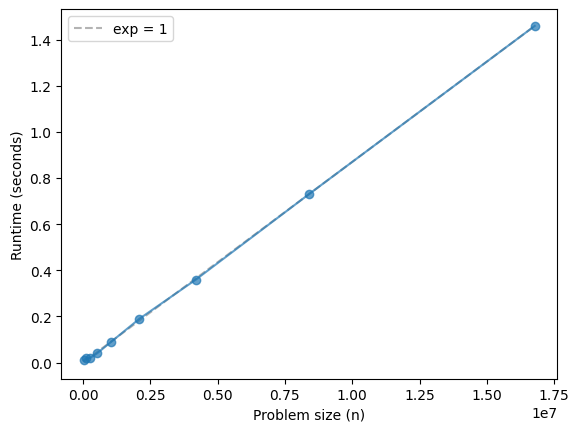

In [53]:
from timing import plot_timing_test

plot_timing_test(ns, ts, scale='linear')

Running these operations `n` times is linear in `n`, which means that each one is constant time, at least on average.

**Exercise:** Modify the examples above to confirm that `append` and `pop` are also constant time.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)